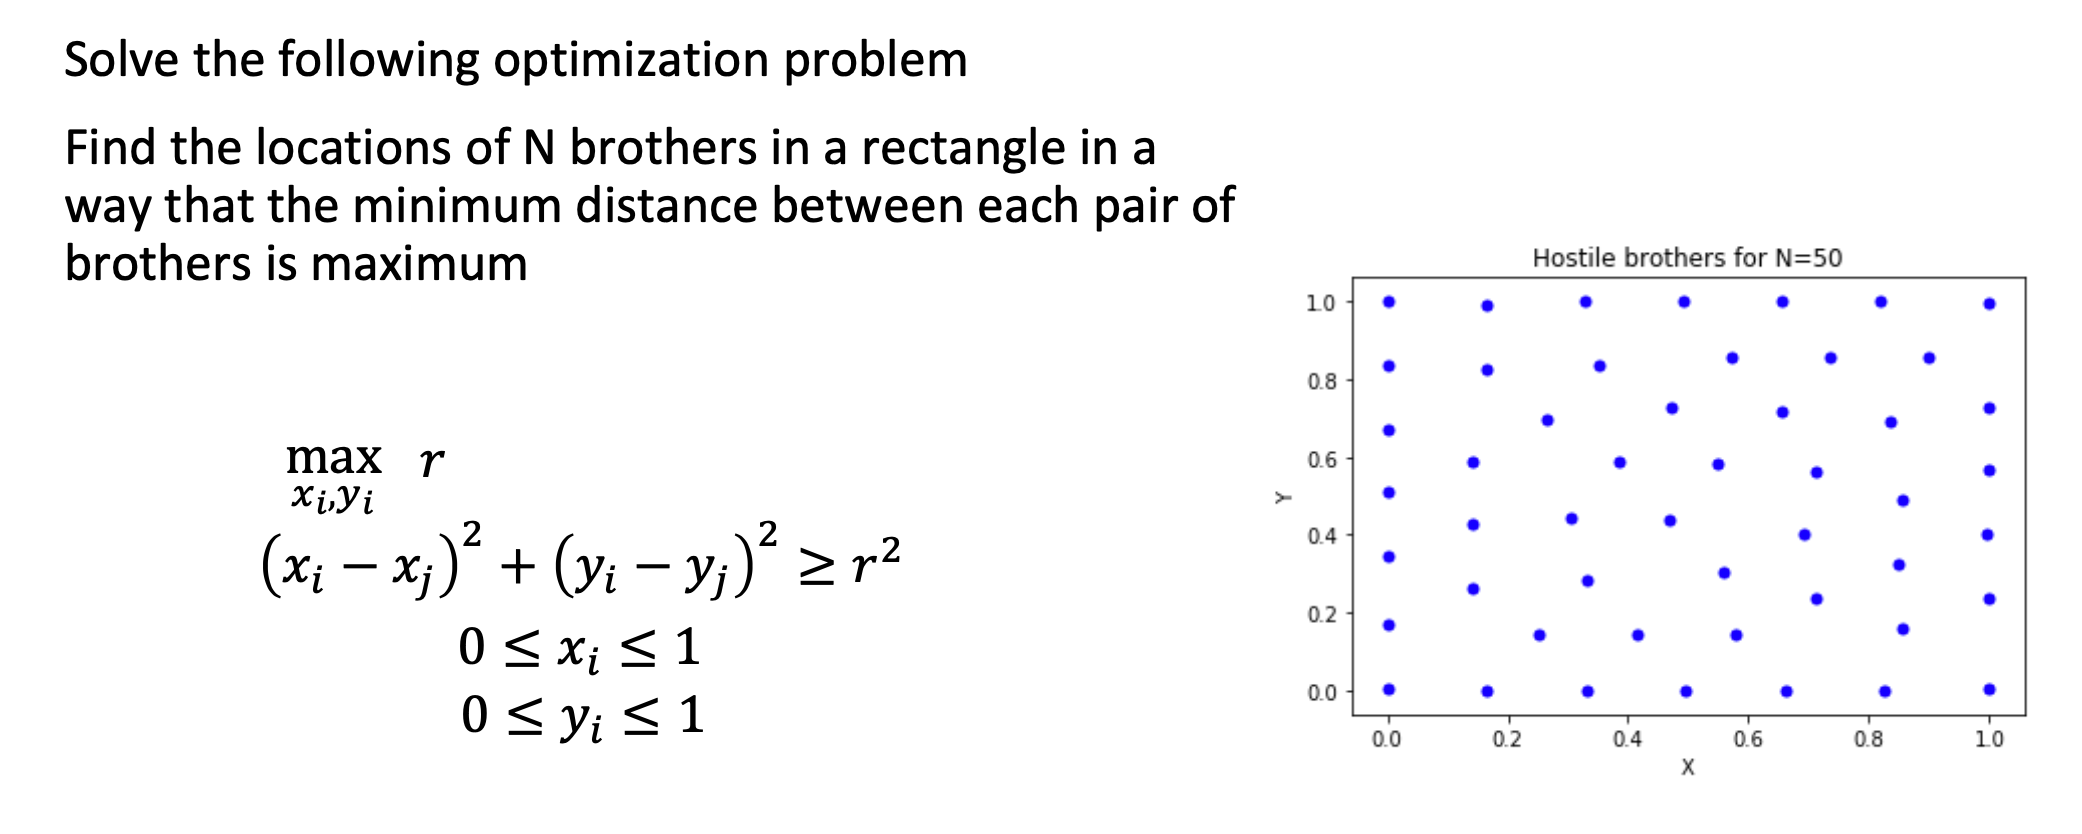

 ### Google Colab

In [ ]:
!pip install -q pyomo
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
ipopt_executable = '/content/ipopt'

     |████████████████████████████████| 9.2 MB 5.0 MB/s 
     |████████████████████████████████| 49 kB 853 kB/s 


## Mac-OS

In [ ]:
!pip install -q pyomo
!curl -s https://ampl.com/dl/open/ipopt/ipopt-osx.zip --output ipopt-osx.zip
!tar xf ipopt-osx.zip ipopt
ipopt_executable = "./ipopt"
!rm ipopt-osx.zip

## Window PC

In [ ]:
!conda install -c conda-forge pyomo pyomo.extras
!conda install -c conda-forge/label/cf201901 ipopt 

 ### Google Colab

In [37]:
# สร้างไฟล์
%mkdir dat

mkdir: cannot create directory ‘dat’: File exists


In [38]:
%%file dat/05.dat

param N:=50;
param L:=1;


Overwriting dat/04.dat


In [1]:
from pyomo.environ import *

import matplotlib.pyplot as plt
import random 

In [2]:
model = AbstractModel()
model.N = Param(mutable=True)
model.i = RangeSet(1, model.N)
model.j = Set(initialize=model.i)
model.L=Param(initialize=1,mutable=True)

def initval(model,i):
    return random.uniform(0,1)


def C1_rule(model,i,j):
    if i!=j:
        return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >=model.r**2
    else:
        return Constraint.Skip




In [3]:
model.x = Var(model.i , bounds=(0,model.L), within=NonNegativeReals, initialize=initval)
model.y = Var(model.i ,bounds=(0,model.L) , within=NonNegativeReals, initialize=initval)
model.r = Var(within=NonNegativeReals)


In [4]:
model.C   = Constraint(model.i,model.j, rule=C1_rule)
model.obj = Objective(expr=model.r, sense=maximize)
opt = SolverFactory('ipopt')

In [5]:
model.N= 50

#instance = model.create_instance("dat/05.dat")
instance = model.create_instance()
results = opt.solve(instance,tee=True)) # solves and updates instance


SyntaxError: unmatched ')' (<ipython-input-5-a10398c8507d>, line 5)

Min distance is  0.163


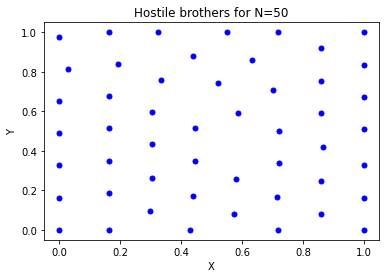

In [6]:
X=[value(instance.x[i]) for i in instance.i]
Y=[value(instance.y[i]) for i in instance.i]
plt.scatter( X,Y,s=25,color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hostile brothers for N='+str(value(instance.N)))
print('Min distance is ',round(value(instance.r),3))